# Ex 1

In [256]:
import numpy as np


def get_rot_matrix(alpha):
    al = np.deg2rad(alpha)
    rot = np.array([[np.cos(al), -np.sin(al)], 
                    [np.sin(al), np.cos(al)]])
    return rot

In [257]:
get_rot_matrix(alpha=-45)

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [258]:
get_rot_matrix(alpha=30)

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

## check

In [259]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def plot_polygons(p_inp, p_out, x_lim, y_lim):
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.add_patch(p_inp)
    ax1.set_xlim(x_lim)
    ax1.set_ylim(y_lim)
    ax2.add_patch(p_out)
    ax2.set_xlim(x_lim)
    ax2.set_ylim(y_lim)
    ax1.grid()
    ax2.grid()
    plt.show()

In [260]:
obj_input = np.array([[1, 0], [1, 2], [3, 2], [3, 0]])

rot_30 = get_rot_matrix(alpha=45)
obj_out = rot_30.dot(obj_input.T).T

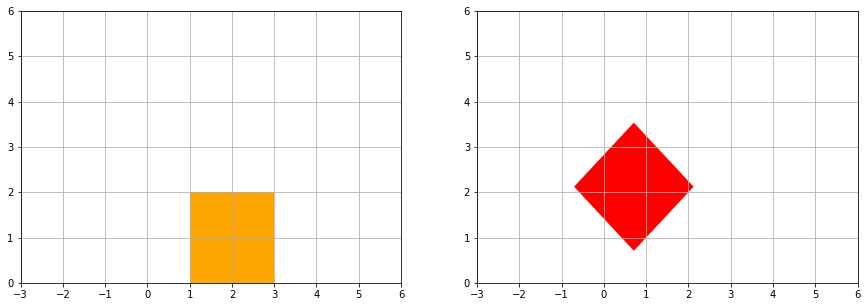

In [261]:
p_inp = Polygon(obj_input, facecolor = 'orange')
p_out = Polygon(obj_out, facecolor = 'red')

plot_polygons(p_inp, p_out, (-3, 6), (0, 6))

 # Ex 2

In [357]:
def rot_around_vec(data, alpha, vec):
    rot_m = get_rot_matrix(alpha)
    rotated = rot_m.dot((data - vec).T).T + vec
    return rotated

In [358]:
def rot_around_vec2(data, alpha, vec):
    rot_m = get_rot_matrix(alpha)
    rot_m_vec = np.array([[rot_m[0][0], rot_m[0][1], vec[0]],
                         [rot_m[1][0], rot_m[1][1], vec[1]], 
                         [0, 0, 1]])
    rotated = rot_m_vec.dot(data.T).T
    return rotated, rot_m, rot_m_vec

## a

In [359]:
c = np.array([2, 3])
alpha = -90

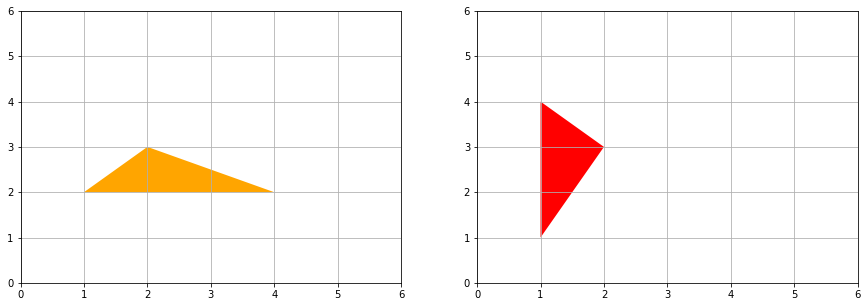

In [360]:
obj_input = np.array([[2, 3], [1, 2], [4, 2]])
obj_out = rot_around_vec(obj_input, alpha, c)

p_inp = Polygon(obj_input, facecolor = 'orange')
p_out = Polygon(obj_out, facecolor = 'red')
plot_polygons(p_inp, p_out, (0, 6), (0, 6))

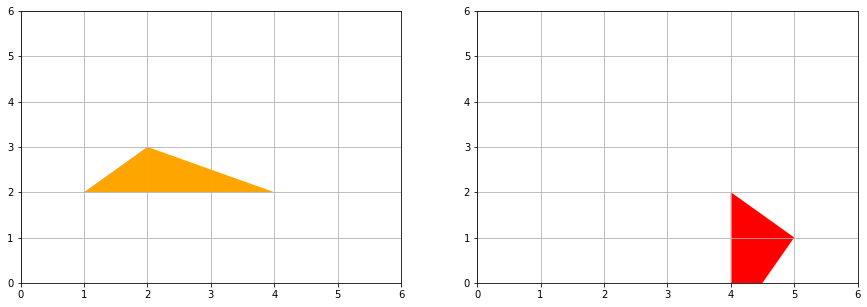

In [375]:
obj_input = np.array([[2, 3, 1], [1, 2, 1], [4, 2, 1]])
obj_out, rotate_m, rotate_vec = rot_around_vec2(obj_input, alpha, c)

p_inp = Polygon(np.delete(obj_input, 2, 1), facecolor = 'orange')
p_out = Polygon(np.delete(obj_out, 2, 1), facecolor = 'red')
plot_polygons(p_inp, p_out, (0, 6), (0, 6))

## b

In [306]:
c = np.array([-1, 4])
alpha = 45

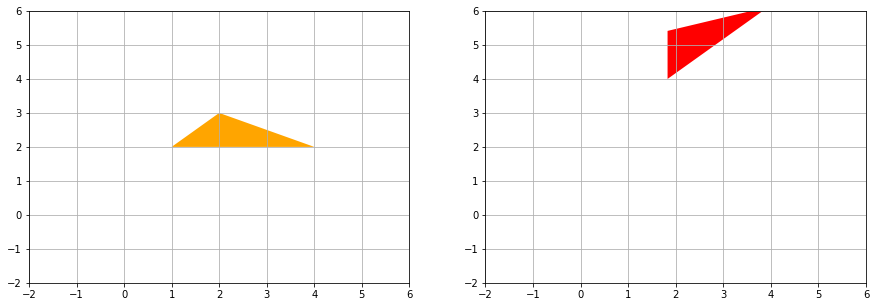

In [307]:
obj_input = np.array([[2, 3], [1, 2], [4, 2]])
obj_out = rot_around_vec(obj_input, alpha, c)


p_inp = Polygon(obj_input, facecolor = 'orange')
p_out = Polygon(obj_out, facecolor = 'red')
plot_polygons(p_inp, p_out, (-2, 6), (-2, 6))

# Ex 3

In [304]:
x0 = 4
obj_out = rot_around_vec(obj_input, 180, np.array([0, x0]))

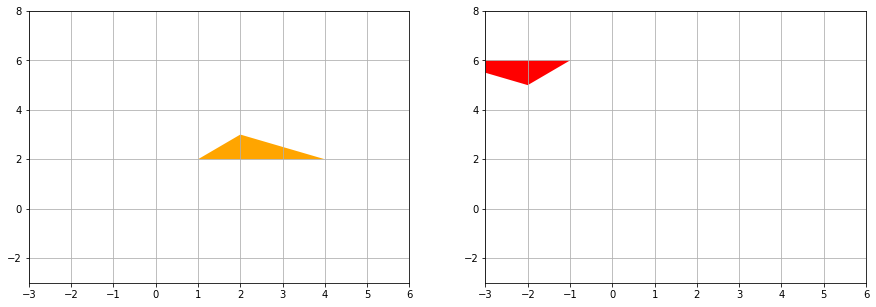

In [305]:
p_inp = Polygon(obj_input, facecolor = 'orange')
p_out = Polygon(obj_out, facecolor = 'red')


plot_polygons(p_inp, p_out, (-3, 6), (-3, 8))